In [33]:
#importaçao de libs
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [45]:
site = 'https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

pagina = requests.get(site)

In [46]:
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [ ]:
coleta

In [48]:
coleta.title.name

'title'

In [59]:
#print(coleta.find(class_='GyAeWb').string())

In [50]:
len(coleta.find_all('span'))

486

In [60]:
def ParamsWebScraping(_params):
  site = f'https://news.google.com/search?for={_params}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

  pagina = requests.get(site)

  dados_nao_tratados = BeautifulSoup(pagina.text, 'html.parser')

  return dados_nao_tratados

In [84]:
dados = ParamsWebScraping('Petrobras')

In [71]:
def BuscaSitesWebScraping(site):
  pagina = requests.get(site)

  dados_nao_tratados = BeautifulSoup(pagina.text, 'html.parser')

  return dados_nao_tratados

In [77]:
dados = BuscaSitesWebScraping('https://www.reclameaqui.com.br/empresa/cartao-de-todos/')

In [ ]:
dados

In [87]:
elemento = dados.find_all('h3')

In [88]:
noticias = [text.get_text() for text in elemento]
len(noticias)

96

In [89]:
print('****' * 10)
print('Noticias encontradas!')
print('****' * 10)

concat_palavras = ''

for nt in noticias:
  print('---' * 10)
  print('--> ', nt)
  palavra = nt.split()

  for p in palavra:
    concat_palavras += ' ' + p

****************************************
Noticias encontradas!
****************************************
------------------------------
-->  Concurso da Petrobras 2023: estatal publica edital com 1.119 vagas de nível técnico
------------------------------
-->  Edital Petrobras publicado; 373 vagas e 1.119 CR! Até R$ 5 mil!
------------------------------
-->  Concurso Petrobras: 373 vagas imediatas e 746 de cadastro - 09/02/2023 - Mercado
------------------------------
-->  Produção da Petrobras (PETR4) não surpreende e atenções se voltam para anúncio de dividendos em 1 de março
------------------------------
-->  Vendas totais de petróleo, gás e derivados da Petrobras caem 0,3% em 2022
------------------------------
-->  Em reunião com a FUP, RH da Petrobrás confirma suspensão das transferências e promete estudar as efetivadas
------------------------------
-->  “O diabo vai estar nos detalhes,” diz gestor americano que comprou 5% da Petrobras
------------------------------
-->  Petrobr

In [90]:
concat_palavras

' Concurso da Petrobras 2023: estatal publica edital com 1.119 vagas de nível técnico Edital Petrobras publicado; 373 vagas e 1.119 CR! Até R$ 5 mil! Concurso Petrobras: 373 vagas imediatas e 746 de cadastro - 09/02/2023 - Mercado Produção da Petrobras (PETR4) não surpreende e atenções se voltam para anúncio de dividendos em 1 de março Vendas totais de petróleo, gás e derivados da Petrobras caem 0,3% em 2022 Em reunião com a FUP, RH da Petrobrás confirma suspensão das transferências e promete estudar as efetivadas “O diabo vai estar nos detalhes,” diz gestor americano que comprou 5% da Petrobras Petrobras (PETR4): ações fecham em queda de 0,46% nesta quinta-feira – Últimas notícias – Estadão E-Investidor – As principais notícias do mercado financeiro Petrobras reduz preço do diesel em 8,8% nas refinarias Petrobras anuncia redução no preço do diesel para as distribuidoras Petrobras (PETR4) anuncia redução de 8,9% nos preços de diesel para as distribuidoras a partir de quarta Transferênc

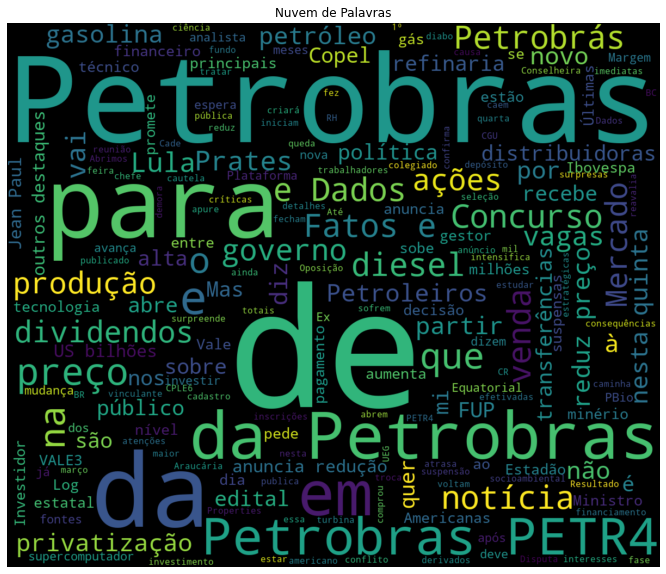

In [91]:
import matplotlib.pyplot as plt

nuvem_palavras = WordCloud(width = 1200, height = 1000).generate(concat_palavras)

figura, eixo = plt.subplots(figsize = (12, 10))
plt.title('Nuvem de Palavras')
eixo.set_axis_off()
eixo.imshow(nuvem_palavras, interpolation='bilinear')

In [92]:
from PIL import Image
Image.open('americanas.png')

Mascara = np.array( Image.open('americanas.png') )
Mascara[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

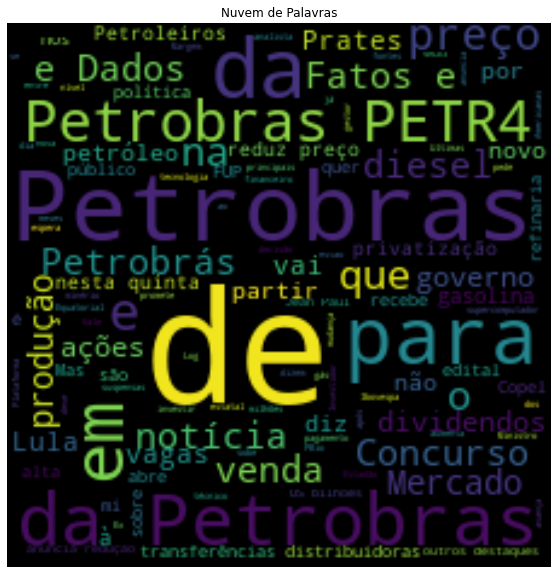

In [93]:
nuvem_palavras = WordCloud(width = 1200,
                           height = 1000,
                           mask=Mascara).generate(concat_palavras)

figura, eixo = plt.subplots(figsize = (12, 10))
plt.title('Nuvem de Palavras')
eixo.set_axis_off()
eixo.imshow(nuvem_palavras, interpolation='bilinear')